# Velocity Confidence Comparison

### Imports and Settings

In [6]:
import numpy as np
import scanpy as sc
from tueplots import bundles
from tueplots import axes
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update(**bundles.neurips2022(usetex=False, nrows=2), **axes.lines(base_width=0.5), **{"figure.dpi": 150})

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

### Load Velocity Confidence

In [2]:
velocity_confidence_pmm = sc.read("adata_results/pancreas1415_not.h5ad").obs["velocity_confidence"].copy()
velocity_confidence_pmm_gr = sc.read("adata_results/pancreas1415_not_4gr.h5ad").obs["velocity_confidence"].copy()
velocity_confidence_upmm = sc.read("adata_results/pancreas1415_bnot_tau0.85.h5ad").obs["velocity_confidence"].copy()
velocity_confidence_scvelo = sc.read("adata_results/pancreas1415_scvelo.h5ad").obs["velocity_confidence"].copy()
velocity_confidence_trajectorynet = sc.read("adata_results/pancreas1415_trajectorynet.h5ad").obs["velocity_confidence"].copy()
# print mean velocity confidence
print(np.mean(velocity_confidence_pmm))
print(np.mean(velocity_confidence_pmm_gr))
print(np.mean(velocity_confidence_upmm))
print(np.mean(velocity_confidence_scvelo))
print(np.mean(velocity_confidence_trajectorynet))

0.9166477676459052
0.937794318608858
0.9594821326056618
0.7674487183635156
0.9857016774742573


In [3]:
# drop nans
velocity_confidence_trajectorynet = velocity_confidence_trajectorynet.dropna()

## Violin plot

In [4]:
data = [velocity_confidence_trajectorynet,
        velocity_confidence_scvelo,
        velocity_confidence_pmm,
        velocity_confidence_upmm,
        velocity_confidence_pmm_gr]

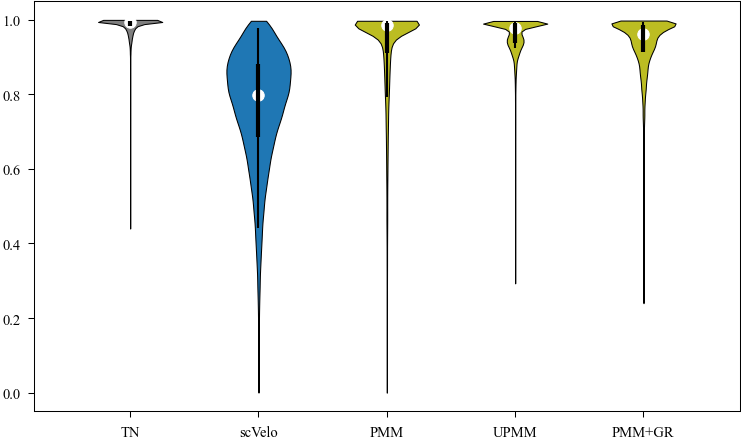

In [7]:
plt.rcParams["figure.figsize"] = (5, 3)
fig = plt.figure()
ax = fig.add_subplot(111)
parts = ax.violinplot(data, vert=True, showmeans=False, showextrema=False, showmedians=False)
# color different violins
for inedx, pc in enumerate(parts['bodies']):
    if index == 0:
        pc.set_facecolor('tab:gray')
    elif index == 1:
        pc.set_facecolor('tab:blue')
    elif index == 2:
        pc.set_facecolor('tab:olive')
    elif index == 3:
        pc.set_facecolor('tab:olive')
    elif index == 4:
        pc.set_facecolor('tab:olive')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
quartile1, medians, quartile3 = [], [], []
for d in data:
    q1, m, q3 = np.percentile(d, [25, 50, 75])
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)
quartile1, medians, quartile3 = np.array(quartile1), np.array(medians), np.array(quartile3)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=1)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=2)
ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ["TN", "scVelo", 'PMM', 'UPMM', 'PMM+GR']
set_axis_style(ax, labels)
#plt.savefig("velconsistency.png", dpi=400, bbox_inches='tight')